In [1]:
# KÜTÜPHANELER
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

## KNN

In [3]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

kategorik değişkenleri, dummy değişkenlere çevirdik. One hot encoding ile. Daha sonra bağımlı değişkenimizi belirtiyoruz y diye. Burda salary değişkenimiz bağımlı değişken. Daha sonra, bağımlı değişkenimizi ve kategorik değişkenlerimizin ilk hallerini çıkartıyoruz.Daha sonra da kalan değişkenler ile dummy değişkenlerimizi datamıza ekleyerek bağımsız değişkemlerimizi toparlamış oluyoruz. Daha sonra train test setlerimizi oluşturuyoruz.

In [4]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


## Model & Tahmin

In [6]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [7]:
knn_model

KNeighborsRegressor()

In [8]:
knn_model.n_neighbors ##default olarak 5 verilmiş.

5

In [9]:
knn_model.metric ##bu merik kullanılmış.

'minkowski'

In [10]:
dir(knn_model) ##bu model nesnesinden alınabilecek olan bazı değerler bunlar.

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_check_n_features',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tree',
 '_validate_data',
 '_y',
 'algorithm',
 'effective_metric_',
 'effective_metric_params_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_features_in_',
 'n_jobs',
 'n_neighbors',
 'n_samples_fit_',
 'p',
 'predict',
 'radius',
 'sc

In [11]:
knn_model.predict(X_test)[0:5] # neyi tahmin ettik? test setinin içindeki bağımsız değerleri verdik.
# ve bağımlı değeri tahmin etmiş olacağız.

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ])

In [12]:
y_pred = knn_model.predict(X_test) #ilkel test hatamıza bakıyoruz. 
# Bunun için önce tahmin ettiğimiz değerleri bir değişkene atıyoruz.

In [18]:
np.sqrt(mean_squared_error(y_test,y_pred)) #bir karekök işlemi yapacağız. bunu hata kareler ort. karekökü değerini hesaplamak istediğimiz için yapıyoruz.
# eğer hata kareler ort hesaplamak isteseydik, karekökü yapmazdık. Ama biz karşılaştırma metriği olarak
# hata kareler ort karekökü kullandığımızdan dolayı bunu yapıyoruz.

426.6570764525201

In [19]:
# bu değer bizim,knn modeli ile elde etmiş olduğumuz ilkel test hatamız. 

## Model Tuning

In [20]:
knn_model # hiperparametreleri ayarlayalım. farklı komşu sayıları deneyip görelim.

KNeighborsRegressor()

In [21]:
RMSE = []
for k in range(10):
    k = k+1 #sıfırı geçmek için.
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    RMSE.append(rmse)
    print("k=", k, " için RMSE değeri:", rmse)

k= 1  için RMSE değeri: 455.03925390751965
k= 2  için RMSE değeri: 415.99629571490965
k= 3  için RMSE değeri: 420.6765370082348
k= 4  için RMSE değeri: 428.8564674588792
k= 5  için RMSE değeri: 426.6570764525201
k= 6  için RMSE değeri: 423.5071669008732
k= 7  için RMSE değeri: 414.9361222421057
k= 8  için RMSE değeri: 413.7094731463598
k= 9  için RMSE değeri: 417.84419990871265
k= 10  için RMSE değeri: 421.6252180741266


### GridsearchCV methodu

yukarıda kendimiz bir döngü yazdık ve değerleri bulduk. burada ise bir fonksiyondan yararlanacağız. Nedir bu? Kullanacak olduğumuz makine öğrenmesi algoritmalarında belirlemeye çalıştığımız hiperparametrelerin değerlerini belirlemek için kullanılan bir fonksiyondur. Birbirinden farklı ve fazla sayıda parametre olduğunda onları bir grid mantığıyla, ızgara mantığıyla değerlendirip olası tüm parametre kombinasyonlarını değerlendirmek ve kıyaslama yapmak için kullanılır.

In [22]:
knn_params = {"n_neighbors": np.arange(1,30,1)} #1den 30 a kadar k değerlerine bakılacak dedik.

In [23]:
knn = KNeighborsRegressor()

In [24]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train, y_train)

In [25]:
knn_cv_model.best_params_

{'n_neighbors': 8}

In [28]:
## Final Model
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]).fit(X_train,y_train)

In [29]:
y_pred = knn_tuned.predict(X_test)

In [30]:
np.sqrt(mean_squared_error(y_test,y_pred))

413.7094731463598

## Destek Vektör Regresyonu (SVR)

In [4]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Model & Tahmin

In [5]:
### Model & Tahmin
svr_model = SVR("linear").fit(X_train, y_train) #linear yerine rbf ile de bakabilirdik. kernel(bu değerin adı) değişebilir.

In [8]:
svr_model

SVR(kernel='linear')

In [9]:
svr_model.predict(X_train)[0:5]

array([219.32622627, 702.43039317, 623.20559641, 153.77538484,
       463.15191157])

In [10]:
svr_model.predict(X_test)[0:5]

array([679.14754919, 633.72883529, 925.68639938, 270.28464317,
       530.26659421])

In [11]:
svr_model.intercept_ #b0

array([-80.15196063])

In [12]:
svr_model.coef_ #b1

array([[ -1.2183904 ,   6.09602978,  -3.67574533,   0.14217072,
          0.51435925,   1.28388992,  12.55922527,  -0.08693754,
          0.46597185,   2.98259931,   0.52944513,  -0.79820793,
         -0.16015531,   0.30872795,   0.28842348,  -1.79560066,
          6.41868986, -10.74313785,   1.33374319]])

### Test Hatamız(ilkel)

In [13]:
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

370.0408415795005

### Model Tuning

In [14]:
svr_params = {"C": [0.1,0.5,1,3]} #aranmasını istediğimiz parametrelerimiz. ceza katsayısı değerleri girdik bakacağımız.

In [15]:
svr_cv_model = GridSearchCV(svr_model, svr_params, cv=5).fit(X_train, y_train)#cv yi az tuttuk zira yukarıda parametre arttıkça süre de artar.

In [16]:
svr_cv_model.best_params_

{'C': 0.5}

In [17]:
svr_cv_model = GridSearchCV(svr_model, svr_params, cv=5, verbose = 2, n_jobs = -1).fit(X_train, y_train) 
# kaç tane işlem yapıldığını görmek için verbose = 2 yazarsak görebiliriz çalışırken durumu raporlar. 
# n_jobs = -1 ile çalışırsa max performans ile çalışır.

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [18]:
svr_tuned = SVR("linear", C=0.5).fit(X_train, y_train)

In [19]:
y_pred = svr_tuned.predict(X_test)

In [20]:
np.sqrt(mean_squared_error(y_test, y_pred))

367.98747616655294

## Yapay Sinir Ağları

In [3]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Model & Tahmin

In [4]:
scaler = StandardScaler()

In [7]:
#Standardizayon yapıyoruz zira bu makine öğrenmesi, homojen datayı tercih eder o yüzden.
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [8]:
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [9]:
mlp_model = MLPRegressor().fit(X_train_scaled, y_train)

In [13]:
print(mlp_model.activation) #relu seçmiş

relu


In [15]:
mlp_model.predict(X_test_scaled)[0:5]

array([22.51133695, 37.56259583, 71.04232241,  7.34451747, 23.53945401])

In [16]:
y_pred = mlp_model.predict(X_test_scaled)
#ilkel test hatamızı hesaplayalım:
np.sqrt(mean_squared_error(y_test,y_pred))

660.8932051641483

## Model Tuning

In [17]:
#parametre gridi oluşturmalıyız.
mlp_params = {"alpha": [0.1, 0.01, 0.02, 0.001, 0.0001], "hidden_layer_sizes": [(10,20), (5,5), (100,100)]}
#alpahalar ceza parametreleri (lambdalar). 
# 2 tane sayı girdiğiimizde 2 tane gizli katman koy demek. bu katmanların içerisindeki nöron sayısı verdik.

In [25]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv= 5, verbose = 2, n_jobs = -1).fit(X_train_scaled, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


In [26]:
mlp_cv_model.best_params_

{'alpha': 0.001, 'hidden_layer_sizes': (100, 100)}

In [27]:
#FİNAL MODEL
mlp_tuned = MLPRegressor(alpha = 0.001, hidden_layer_sizes = (100,100)).fit(X_train_scaled,y_train)

In [28]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [29]:
np.sqrt(mean_squared_error(y_test,y_pred))

349.97918692517845

## CART(Classification and Regression)

In [4]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [5]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

### Model ve Tahmin

In [13]:
cart_model = DecisionTreeRegressor(max_leaf_nodes= 8)

In [14]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=8)

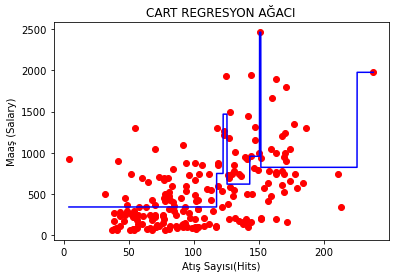

In [15]:
#Nasıl çalıştığı görmek için:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
  
plt.scatter(X_train, y_train, color = 'red') 
  
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  

plt.title('CART REGRESYON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

Normalde biz atış sayısı ile maaş arasındaki ilişkiyi fonksiyonel biçimde tanımlamak istediğimizde buraya bir tane doğru yerleştiriyorduk. Ve bu doğru aslında matematiksel bir formüldü. Bir fonksiyondu. Bu fonksiyonda x yerine hits'in değerini girdğimizde maaşın değerlerini tahmin ediyorduk. Fakat burada bir dallanma yapısı ifade edilmiş. Buradaki yapı şu anda karışık. Çünkü hiçbir parametre ile oynamadık. max leaf nodes u ekleyince belirttiğimiz kadar dallanma oldu. mesela 110larda bi dala ayrılmış. 

In [16]:
#Tek değişkenli tahmin
cart_model.predict(X_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [17]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

473.0081902427357

In [28]:
#Tüm değişkenlerle tahmin
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [29]:
cart_model2 = DecisionTreeRegressor().fit(X_train, y_train)

In [30]:
y_pred2 = cart_model2.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred2))

473.78343811606135

### Model Tuning

In [32]:
cart_model = DecisionTreeRegressor(max_depth = 3).fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))
# Max depth: ğacın ne kadar derinleşeceğini ifade ediyor.
#Max leaf nodes, min sample split. bu parametreler genelde dallanmayı kontrol etmek için kullanılan parametrelerdir.

391.5530522634766

In [33]:
?cart_model

Type:        DecisionTreeRegressor
String form: DecisionTreeRegressor(max_depth=3)
File:        ~/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"mse", "friedman_mse", "mae", "poisson"}, default="mse"
    The function to measure the quality of a split. Supported criteria
    are "mse" for the mean squared error, which is equal to variance
    reduction as feature selection criterion and minimizes the L2 loss
    using the mean of each terminal node, "friedman_mse", which uses mean
    squared error with Friedman's improvement score for potential splits,
    "mae" for the mean absolute error, which minimizes the L1 loss using
    the median of each terminal node, and "poisson" which uses reduction in
    Poisson deviance to find splits.

    .. versionadded:: 0.18
       Mean Absolute Error (MAE) criterion.

    .. versionadded:: 0.24
        Poisso

In [34]:
cart_params = {"max_depth": [2,3,4,5,10,20], "min_samples_split": [2,10,5,30,50,100]}

In [35]:
cart_model = DecisionTreeRegressor()

In [36]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv=10).fit(X_train, y_train)

In [37]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [38]:
#final model
cart_model_tuned = DecisionTreeRegressor(max_depth = 4, min_samples_split = 50).fit(X_train, y_train)

In [39]:
y_pred = cart_model_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

361.0876906511434

## Random Forest

In [5]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

### Model&Tahmin

In [6]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)

In [16]:
rf_model

RandomForestRegressor(random_state=42)

In [15]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred)) #ilkel test hatamız

344.8191624908484

## Model Tuning

In [18]:
rf_params = {"max_depth": [5,8,10], 
"max_features": [2,5,10],
"n_estimators": [200,500,1000,2000],
"min_samples_split": [2,10,80,100]}

In [19]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs = -1, verbose=2).fit(X_train,y_train)
#n jobs: işlemciler full performns çalışsın, verbose ile de bütün bu işlemleri gözlemlemek istiyoruz diyoruz.

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   2.5s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   2.6s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   2.7s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators

In [20]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [21]:
rf_tuned_model = RandomForestRegressor(random_state=42, 
max_depth= 8,
max_features= 2,
min_samples_split= 2,
n_estimators= 200)
rf_tuned = rf_tuned_model.fit(X_train,y_train)

In [22]:
rf_tuned

RandomForestRegressor(max_depth=8, max_features=2, n_estimators=200,
                      random_state=42)

In [24]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

349.1649379391149

### Değişken Önem Düzeyi

In [25]:
rf_tuned.feature_importances_*100

array([5.81548333, 6.38504706, 3.52630602, 4.18186433, 4.68121896,
       4.92291235, 7.38388416, 9.72940722, 8.68736867, 7.89130478,
       8.78157948, 8.30862336, 9.69431474, 4.71131944, 2.04114365,
       1.83878075, 0.38469815, 0.55485771, 0.47988582])

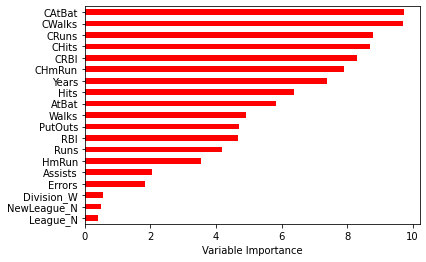

In [26]:
Importance = pd.DataFrame({'Importance':rf_tuned.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## Gradient Boost Machines

In [4]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
# Model Tahmin
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [6]:
gbm_model

GradientBoostingRegressor()

In [7]:
y_pred = gbm_model.predict(X_test)

In [8]:
np.sqrt(mean_squared_error(y_test,y_pred))

347.3630194880678

### Model Tuning

In [9]:
gbm_params = {"learning_rate": [0.001,0.1,0.01],
              "max_depth": [3,5,8],
              "n_estimators": [100,200,500],
              "subsample": [1,0.5,0.8],
              "loss": ["ls","lad","quantile"]}

In [10]:
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv=5, n_jobs=-1, verbose=3).fit(X_train,y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 3/5] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1; total time=   0.3s
[CV 1/5] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1; total time=   0.4s
[CV 4/5] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1; total time=   0.4s
[CV 2/5] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1; total time=   0.4s
[CV 1/5] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV 5/5] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1; total time=   0.3s
[CV 3/5] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV 2/5] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV 4/5] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsampl

In [11]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'n_estimators': 200,
 'subsample': 0.5}

In [12]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,
                                      loss='ls',
                                      max_depth=3,
                                      n_estimators=200,
                                      subsample=0.5).fit(X_train, y_train)

In [13]:
y_pred_gbm = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred_gbm))

330.98980629813525

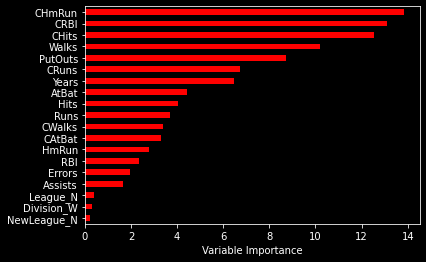

In [14]:
# değişken önem düzeyi
Importance = pd.DataFrame({'Importance':gbm_tuned.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## XGBoost

In [3]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [4]:
# Model & Tahmin

!pip install xgboost

In [4]:
import xgboost

In [5]:
from xgboost import XGBRegressor

In [6]:
xgb = XGBRegressor().fit(X_train, y_train)

[14:55:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [7]:
y_pred = xgb.predict(X_test)

In [8]:
np.sqrt(mean_squared_error(y_test,y_pred))

359.91750599447033

## Model Tuning

In [9]:
xgb_params = {"learning_rate": [0.1,0.01,0.5],
             "max_depth": [2,3,4,5,8],
             "n_estimators": [100,200,500,1000],
             "colsample_bytree": [0.4,0.7,1]}
#learning rate: overfittingi engellemek adına kullanılan bir hiperparametredir. Daraltma adım boyunu ifade etmektedir.
#max_depth: maximum derinlik.
#n_estimators: kullanılacak olan ağaç sayısını ifade etmektedir. tahminci sayısını ifade etmektedir.
#colsmaple_bytree: oluşturulacak olan ağaçlarda değişkenlerden alınacak olan alt küme oranını ifade ediyor.

In [10]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
[15:57:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [11]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.5,
 'max_depth': 2,
 'n_estimators': 100}

In [12]:
xgb_tuned = XGBRegressor(colsample_bytree=0.7,
                         learning_rate=0.5,
                         max_depth=2,
                         n_estimators=100).fit(X_train, y_train)

[16:30:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [13]:
y_pred = xgb_tuned.predict(X_test)

In [14]:
np.sqrt(mean_squared_error(y_test, y_pred))

360.59070607134015

## Light GBM

In [15]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [16]:
!pip install lightgbm

     |████████████████████████████████| 1.2 MB 1.0 MB/s eta 0:00:01


In [20]:
conda install -c conda-forge lightgbm #bu kod bir üstteki hata verirse diye.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/mustafa/opt/anaconda3

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.10.8  |       h033912b_0         139 KB  conda-forge
    certifi-2021.10.8          |   py37hf985489_1         145 KB  conda-forge
    conda-4.11.0               |   py37hf985489_0        16.9 MB  conda-forge
    lightgbm-3.2.1             |   py37h23ab428_0         996 KB
    llvm-openmp-12.0.1         |       hda6cdc1_1         287 KB  conda-forge
    openssl-1.1.1l             |       h0d85af4_0         1.9 MB  conda-forge
    python_abi-3.7             |          2_cp37m           4 KB  conda-forg

In [21]:
from lightgbm import LGBMRegressor

In [22]:
# Model & Tahmin
lgb_model = LGBMRegressor().fit(X_train, y_train)

In [27]:
lgb_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [28]:
y_pred = lgb_model.predict(X_test)

In [29]:
np.sqrt(mean_squared_error(y_test,y_pred))

363.8712087611089

In [30]:
# Model Tuning

lgbm_params = {"learning_rate": [0.01, 0.1, 0.5, 1],
               "n_estimators": [20,40,100,200,500,1000],
               "max_depth": [1,2,3,4,5,6,7,8,9,10]}

# Biz bu parametreleri neye göre veiyoruz? Yukarıda default olarak verilen parametreleri gördük. 
# Bunlar, modeli kuran kişilerin ön tanımlı olarak verdiği parametreler. Biz de bu sayıların, parametrelerin
# Etrafında değerler vererek bunu tune ediyoruz. (bu ilkel yol tabi.)

In [31]:
lgbm_cv_model = GridSearchCV(lgb_model, lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


In [32]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 20}

In [33]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                          max_depth = 6, 
                          n_estimators = 20).fit(X_train, y_train)

In [35]:
y_pred = lgbm_tuned.predict(X_test)

In [36]:
np.sqrt(mean_squared_error(y_test, y_pred))

371.5044868943621

## CatBoost

In [37]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [38]:
!pip install catboost

     |████████████████████████████████| 12.7 MB 2.5 MB/s eta 0:00:01    |███▎                            | 1.3 MB 1.3 MB/s eta 0:00:09     |█████████████████████████████▌  | 11.7 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 46 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 26.5 MB 102 kB/s eta 0:00:01    |▋                               | 481 kB 6.1 MB/s eta 0:00:05     |████▍                           | 3.6 MB 3.8 MB/s eta 0:00:06     |███████▍                        | 6.1 MB 3.8 MB/s eta 0:00:06     |█████████████████               | 14.1 MB 1.9 MB/s eta 0:00:07     |██████████████████              | 15.0 MB 1.9 MB/s eta 0:00:07     |█████████████████████████       | 20.7 MB 2.4 MB/s eta 0:00:03


In [39]:
# Model & Tahmin
from catboost import CatBoostRegressor

In [44]:
catb_model = CatBoostRegressor().fit(X_train, y_train)

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 4.55ms	remaining: 4.55s
1:	learn: 431.3923642	total: 8.4ms	remaining: 4.19s
2:	learn: 424.8820360	total: 12.4ms	remaining: 4.11s
3:	learn: 418.2514904	total: 15.9ms	remaining: 3.96s
4:	learn: 412.6394021	total: 18.7ms	remaining: 3.72s
5:	learn: 406.6247020	total: 22.8ms	remaining: 3.77s
6:	learn: 400.5321206	total: 26.4ms	remaining: 3.75s
7:	learn: 394.6683437	total: 30.1ms	remaining: 3.74s
8:	learn: 388.2496484	total: 34.7ms	remaining: 3.82s
9:	learn: 382.9448842	total: 39.9ms	remaining: 3.95s
10:	learn: 377.2600080	total: 44.1ms	remaining: 3.96s
11:	learn: 372.4829606	total: 48.9ms	remaining: 4.03s
12:	learn: 366.6823437	total: 52.9ms	remaining: 4.02s
13:	learn: 362.6076230	total: 57.7ms	remaining: 4.07s
14:	learn: 358.0107745	total: 61.4ms	remaining: 4.03s
15:	learn: 353.2802665	total: 65.4ms	remaining: 4.02s
16:	learn: 348.5646265	total: 69.1ms	remaining: 4s
17:	learn: 343.6407912	total: 74.8ms	remaining: 4.08s
18:	learn: 3

In [45]:
y_pred = catb_model.predict(X_test)

In [46]:
np.sqrt(mean_squared_error(y_test,y_pred))

351.194631344607

In [47]:
#Model Tuning
catb_model.get_params()

{'loss_function': 'RMSE'}

In [48]:
catb_params = {"iterations": [200,500,100],
              "learning_rate": [0.01,0.1],
              "depth": [3,6,8]}

#İterations: ağaç sayısıdır. fit edilecek olan model sayısıdır.

In [50]:
catb_model = CatBoostRegressor() #önce bi boş nesnemizi çağıralım

In [51]:
catb_cv_model = GridSearchCV(catb_model, 
                           catb_params, 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 425.7900818	total: 1.69ms	remaining: 336ms
1:	learn: 404.8723520	total: 3.69ms	remaining: 366ms
2:	learn: 387.4057666	total: 4.67ms	remaining: 306ms
3:	learn: 372.2801584	total: 5.56ms	remaining: 272ms
4:	learn: 358.9204229	total: 6.6ms	remaining: 258ms
5:	learn: 347.0083933	total: 8.35ms	remaining: 270ms
6:	learn: 336.0130818	total: 9.58ms	remaining: 264ms
7:	learn: 324.3923300	total: 10.9ms	remaining: 262ms
8:	learn: 314.8690957	total: 11.8ms	remaining: 251ms
9:	learn: 308.5075563	total: 12.6ms	remaining: 239ms
10:	learn: 298.8587285	total: 14ms	remaining: 241ms
11:	learn: 294.7655438	total: 14.9ms	remaining: 234ms
12:	learn: 288.0697862	total: 15.8ms	remaining: 227ms
13:	learn: 282.6697154	total: 16.5ms	remaining: 219ms
14:	learn: 277.6121667	total: 17.3ms	remaining: 213ms
15:	learn: 273.4383979	total: 18.1ms	remaining: 208ms
16:	learn: 269.1556201	total: 18.9ms	remaining: 204ms
17:	learn: 264.8098704	total: 21.1

In [52]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.1}

In [53]:
catb_tuned = CatBoostRegressor(depth = 3, iterations = 500, learning_rate = 0.1).fit(X_train, y_train)

0:	learn: 425.7900818	total: 1.83ms	remaining: 914ms
1:	learn: 404.8723520	total: 3ms	remaining: 748ms
2:	learn: 387.4057666	total: 20.2ms	remaining: 3.35s
3:	learn: 372.2801584	total: 21.1ms	remaining: 2.62s
4:	learn: 358.9204229	total: 22ms	remaining: 2.18s
5:	learn: 347.0083933	total: 23.7ms	remaining: 1.95s
6:	learn: 336.0130818	total: 24.5ms	remaining: 1.72s
7:	learn: 324.3923300	total: 25.2ms	remaining: 1.55s
8:	learn: 314.8690957	total: 26.5ms	remaining: 1.44s
9:	learn: 308.5075563	total: 27.5ms	remaining: 1.35s
10:	learn: 298.8587285	total: 29ms	remaining: 1.29s
11:	learn: 294.7655438	total: 30.5ms	remaining: 1.24s
12:	learn: 288.0697862	total: 31.4ms	remaining: 1.18s
13:	learn: 282.6697154	total: 32.2ms	remaining: 1.12s
14:	learn: 277.6121667	total: 33ms	remaining: 1.07s
15:	learn: 273.4383979	total: 33.7ms	remaining: 1.02s
16:	learn: 269.1556201	total: 34.4ms	remaining: 977ms
17:	learn: 264.8098704	total: 36.5ms	remaining: 979ms
18:	learn: 261.6700768	total: 37.6ms	remaining:

In [54]:
y_pred = catb_tuned.predict(X_test)

In [55]:
np.sqrt(mean_squared_error(y_test, y_pred))

336.40041748521486

# Makine Öğrenmesinin Otomatikleştirilmesi

In [56]:
df = pd.read_csv("Hitters.csv") #Veri okumayı temsil ediyor.

#bu iki satır veri ön işlemeyi temsil ediyor.
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']]) #Değişken dönüştürme.

In [57]:
def compML(df, y, alg):
    #train-test ayrimi
    y = df[y]
    X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
    X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
    #modelleme
    model = alg().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    model_ismi = alg.__name__
    print(model_ismi, "Modeli Test Hatası:",RMSE)

In [58]:
compML(df, "Salary", SVR)

SVR Modeli Test Hatası: 460.0032657244849


In [59]:
models = [LGBMRegressor, 
          XGBRegressor, 
          GradientBoostingRegressor, 
          RandomForestRegressor, 
          DecisionTreeRegressor,
          MLPRegressor,
          KNeighborsRegressor, 
          SVR]

In [60]:
for i in models:
    compML(df, "Salary", i)

LGBMRegressor Modeli Test Hatası: 363.8712087611089
[22:15:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor Modeli Test Hatası: 359.91750599447033
GradientBoostingRegressor Modeli Test Hatası: 355.1519782239639
RandomForestRegressor Modeli Test Hatası: 329.89991966760414
DecisionTreeRegressor Modeli Test Hatası: 529.8240100212809
MLPRegressor Modeli Test Hatası: 442.42337421844974
KNeighborsRegressor Modeli Test Hatası: 426.6570764525201
SVR Modeli Test Hatası: 460.0032657244849


Makina öğrenmesi dediğimiz şey aslında bir fonksiyondan ibaret.
Aslında önemli olan veriyi iyi anlamak, yeni değişkenler oluşturabilmek, değişkenlerin birbiri arasındaki ilişkileri tanımlayabilmek ve modelleri optimize etmektir.